In [1]:
#adapted from  https://www.youtube.com/watch?v=n5a0WBIQitI

#loading the dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

from keras import models
from keras import layers
import keras as kr
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#creating the sequential model
mod = kr.models.Sequential()
mod.add(kr.layers.Dense(512, activation='relu',input_shape=(28*28,)))
#output layer 
mod.add(kr.layers.Dense(10, activation='softmax'))

In [3]:
mod.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
x_train = x_train.reshape((60000,28*28))
x_train = x_train.astype('float32') / 255

In [5]:
x_test = x_test.reshape((10000,28*28))
x_test = x_test.astype('float32') / 255

In [6]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
#epochs is the number of iterations over the entire dataset.
mod.fit(x_train, y_train, epochs=3, batch_size=128)

Epoch 1/3
60000/60000 [==============================] - 8s 132us/step - loss: 0.2672 - accuracy: 0.9239
Epoch 2/3
60000/60000 [==============================] - 7s 123us/step - loss: 0.1081 - accuracy: 0.9683
Epoch 3/3
60000/60000 [==============================] - 7s 122us/step - loss: 0.0700 - accuracy: 0.9800


In [11]:
# Evaluate the model on the test data.
test_loss, test_acc = mod.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 86us/step


In [12]:
print('testing accuracy: ', test_acc)

testing accuracy:  0.9753000140190125


In [15]:
mod.save('model.h5')

In [16]:
new_model = models.load_model('model.h5')

In [18]:
predictions = new_model.predict([x_test])
print('At predictions index 0, number is a ', np.argmax(predictions[1]))

At predictions index 0, number is a  2


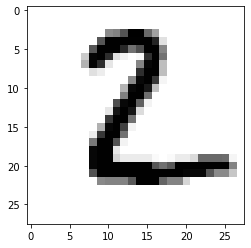

In [19]:
plt.imshow(x_test[1].reshape(28, 28), cmap=plt.cm.binary)